 
# Alpha and Beta Diversity

Different higher-level measures are often used to describe the microbiome in a sample. These do not provide information on changes in the abundance of specific taxa but allow us to access a broader change or difference in the composition of microorganisms. Alpha and beta diversity are examples of such measures.

Different measures exist to estimate diversity within a single sample, jointly called alpha diversity. The different measures reflect the richness (number) or distribution (evenness) of a microbial sample or aim to reflect a combination of both properties.

Rarefaction curves are often used when calculating alpha diversity indices because increasing numbers of sequenced taxa allow increasingly accurate estimates of total population diversity. Rarefaction curves can therefore be used to estimate the full sample richness, as compared to the observed sample richness.

While alpha diversity is a measure of microbiome diversity applicable to a single sample, beta diversity is a measure of the similarity or dissimilarity of two communities. As for alpha diversity, many indices exist, each reflecting different aspects of community heterogeneity. Key differences relate to how the indices value variation in rare species if they consider presence/absence only or incorporate abundance, and how they interpret shared absence. Bray-Curtis dissimilarity is a popular measure that considers both size (overall abundance per sample) and shape (abundance of each taxon) of the communities (Bray, 1957). Beta diversity is an essential measure for many popular statistical methods in ecology, such as ordination-based methods, and is widely used for studying the association between environmental variables and microbial composition.

In summary, alpha diversity measures can be seen as a summary statistic of a single population (within-sample diversity), while beta diversity measures are estimates of similarity or dissimilarity between populations (between samples).

**Source**: (https://biomcare.com/info/key-terms-in-microbiome-projects/)

### STEP : Diversity Analysis

Using QIIME2 to create diversity analisys graphs and calculations.

- [QIIME2 Workflow Overview](https://docs.qiime2.org/2022.8/tutorials/overview/)


#### Methods
- [diversity](https://docs.qiime2.org/2022.8/plugins/available/diversity/)
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/)
- [diversity alpha_phylogenetic](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-phylogenetic/)
- [diversity beta](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta/)
- [diversity core_metrics](https://docs.qiime2.org/2022.8/plugins/available/diversity/core-metrics/)
- [diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/)
- [diversity beta_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta-group-significance/)
- [feature_table core_features](https://docs.qiime2.org/2022.8/plugins/available/feature-table/core-features/)
- [feature_table summarize](https://docs.qiime2.org/2022.8/plugins/available/feature-table/summarize/)
- [taxa filter-table](https://docs.qiime2.org/2022.8/plugins/available/taxa/filter-table/)
- [taxa collapse](https://docs.qiime2.org/2022.8/plugins/available/taxa/collapse/)

## Setup and settings

In [1]:
# Importing packages
import os
import pandas as pd
from qiime2 import Artifact
from qiime2 import Visualization
from qiime2 import Metadata

from qiime2.plugins.phylogeny.pipelines import align_to_tree_mafft_fasttree

from qiime2.plugins.diversity.pipelines import alpha
from qiime2.plugins.diversity.pipelines import beta
from qiime2.plugins.diversity.pipelines import core_metrics
from qiime2.plugins.diversity.pipelines import alpha_phylogenetic

from qiime2.plugins.diversity.visualizers import alpha_group_significance
from qiime2.plugins.diversity.visualizers import beta_group_significance
from qiime2.plugins.diversity.visualizers import alpha_correlation
from qiime2.plugins.diversity.visualizers import beta_rarefaction

from qiime2.plugins.taxa.methods import filter_table
from qiime2.plugins.taxa.methods import collapse

from qiime2.plugins.feature_table.visualizers import tabulate_seqs
from qiime2.plugins.feature_table.visualizers import summarize
from qiime2.plugins.feature_table.visualizers import core_features

from qiime2.plugins.alignment.methods import mafft


import matplotlib.pyplot as plt

%matplotlib inline

### Receiving the parameters

The following cell can receive parameters using the [papermill](https://papermill.readthedocs.io/en/latest/) tool.

In [2]:
metadata_file = '/home/lauro/nupeb/rede-micro/redemicro-miliane-nutri/data/raw/metadata/miliane-metadata-CxAC.tsv'
base_dir = os.path.join('/', 'home', 'lauro', 'nupeb', 'rede-micro', 'redemicro-miliane-nutri')
experiment_name = 'miliane-CxAC-trim'
class_col = 'group-id'
replace_files = False

In [3]:
# Parameters
experiment_name = "andressa"
base_dir = "/home/lauro/nupeb/rede-micro/redemicro-andressa-lbtm"
manifest_file = "/home/lauro/nupeb/rede-micro/redemicro-andressa-lbtm/data/manifest.csv"
metadata_file = "/home/lauro/nupeb/rede-micro/redemicro-andressa-lbtm/data/metadata.tsv"
class_col = "group-id"
classifier_file = "/home/lauro/nupeb/rede-micro/models/silva-138-99-nb-classifier.qza"
replace_files = False
phred = 20
trunc_f = 0
trunc_r = 0
overlap = 12
threads = 6


In [4]:
experiment_folder = os.path.abspath(os.path.join(base_dir, 'experiments', experiment_name))
img_folder = os.path.abspath(os.path.join(experiment_folder, 'imgs'))

### Defining names, paths and flags

In [5]:
# QIIME2 Artifacts folder
qiime_folder = os.path.join(experiment_folder, 'qiime-artifacts')

# Input - DADA2 Artifacts
dada2_tabs_path = os.path.join(qiime_folder, 'dada2-tabs.qza')
dada2_reps_path = os.path.join(qiime_folder, 'dada2-reps.qza')
dada2_stat_path = os.path.join(qiime_folder, 'dada2-stat.qza')

# Input - Taxonaomic Artifacts
taxonomy_path = os.path.join(qiime_folder, 'metatax.qza')

# Output -Diversity Artifacts
alpha_diversity_path = os.path.join(qiime_folder, 'alpha-diversity.qza')
alpha_diversity_view_path = os.path.join(qiime_folder, 'alpha-diversity.qzv')
beta_diversity_path = os.path.join(qiime_folder, 'beta-diversity.qza')
beta_diversity_view_path = os.path.join(qiime_folder, 'beta-diversity.qzv')

dada2_tabs_view = os.path.join(qiime_folder, 'dada2-tabs.qzv')
dada2_reps_view = os.path.join(qiime_folder, 'dada2-reps.qzv')
dada2_core_view = os.path.join(qiime_folder, 'dada2-core.qzv')

# Flag - Load or create files
need_tax = not (os.path.isfile(alpha_diversity_path)) or replace_files
need_view = not (os.path.isfile(alpha_diversity_view_path)) or replace_files

In [6]:
def filter_and_collapse(tab, seqs, tax, meta, lvl, exclude=True, exclude_list='uncultured,unidentified,metagenome'):
    from qiime2.plugins.taxa.methods import collapse
    from qiime2.plugins.taxa.methods import filter_table
    from qiime2.plugins.feature_table.methods import filter_seqs
    from qiime2.plugins.feature_table.visualizers import summarize
    
    to_include = ('d', 'p', 'c', 'o', 'f', 'g', 's')[lvl-1]
    to_include += '__'
    to_exclude = exclude_list if exclude else None
    
    filtered_tabs = filter_table(
        table=tab, 
        taxonomy=tax,
        include=to_include,
        exclude=to_exclude,
        mode='contains').filtered_table
    
    filtered_seqs = filter_seqs(
        data = seqs,
        table = filtered_tabs,
    ).filtered_data
    
    collapsed_table = collapse(table=filtered_tabs, taxonomy=tax, level=lvl).collapsed_table
    collapsed_table_view = summarize(table=collapsed_table, sample_metadata=meta).visualization
    
    return collapsed_table, collapsed_table_view, filtered_seqs

## Step execution

### Load input files

This Step import the QIIME2 `FeatureTable[Frequency]` Artifact and the `Metadata` file.

In [7]:
#Load Metadata
metadata_qa = Metadata.load(metadata_file)

#Load FeatureTable[Frequency]
tabs = Artifact.load(dada2_tabs_path)
tabs_df = tabs.view(Metadata).to_dataframe().T

# FeatureData[Sequence]
reps = Artifact.load(dada2_reps_path)

# FeatureData[Taxonomy]
tax = Artifact.load(taxonomy_path)

In [8]:
# lvl = 7
# exclude = True
# tabs, collapsed_table_view, reps = filter_and_collapse(
#                     tabs, reps, tax, metadata_qa, 
#                     lvl=lvl,
#                     exclude=exclude, 
#                     exclude_list='uncultured,unidentified,metagenome')
# collapsed_table_view

'/home/lauro/nupeb/rede-micro/redemicro-andressa-lbtm/experiments/andressa/qiime-artifacts/dada2-core.qzv'

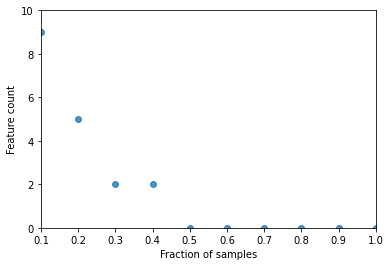

In [9]:
tabs_view = summarize(table=tabs, sample_metadata=metadata_qa).visualization
tabs_view.save(dada2_tabs_view)
reps_view = tabulate_seqs(data=reps).visualization
reps_view.save(dada2_reps_view)
core_view = core_features(table=tabs, min_fraction=.1, steps=10).visualization
core_view.save(dada2_core_view)

In [10]:
# import zipfile
# from io import StringIO
# import pandas as pd
# with zipfile.ZipFile(dada2_core_view, 'r') as zip_ref:
#     names = [x for x in zip_ref.namelist() if x.endswith('1.000.tsv')]
#     print(names)
#     with zip_ref.open(names[0]) as myfile:
#         txt = str(myfile.read(), 'utf-8')
#         txt = StringIO(txt)
#         df = pd.read_csv(txt, sep='\t')
#         print(df)   

## Alpha diversity analysis

#### Reference
- [The Use and Types of Alpha-Diversity Metrics in Microbial NGS](https://www.cd-genomics.com/microbioseq/the-use-and-types-of-alpha-diversity-metrics-in-microbial-ngs.html)
- [Alpha diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.alpha.html)

#### Methods
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/): Computes a user-specified alpha diversity metric for all samples in a
feature table.
- [diversity alpha_phylogenetic](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-phylogenetic/): Computes a user-specified phylogenetic alpha diversity metric for all
samples in a feature table.
- [diversity alpha_correlation](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-correlation/): Determine whether numeric sample metadata columns are correlated with alpha diversity.
- [diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/): Visually and statistically compare groups of alpha diversity values.

### Compute Alpha Diversity vectors
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/): Computes a user-specified alpha diversity metric for all samples in a feature table.
- [Alpha diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.alpha.html)
 - Choices: ('ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_features', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong')

In [11]:
metrics = ('ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_features', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong')
alpha_diversities = dict()
for metric in metrics:
    print(f"Calculating alpha diversty: {metric}")
    try:
        alpha_diversity = alpha(table=tabs, metric=metric).alpha_diversity
        alpha_diversities[metric] = alpha_diversity
        print(f"DONE: Calculating alpha diversty: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating alpha diversty: {metric}")
        print(e)

Calculating alpha diversty: ace
DONE: Calculating alpha diversty: ace
Calculating alpha diversty: berger_parker_d
DONE: Calculating alpha diversty: berger_parker_d
Calculating alpha diversty: brillouin_d
DONE: Calculating alpha diversty: brillouin_d
Calculating alpha diversty: chao1
DONE: Calculating alpha diversty: chao1
Calculating alpha diversty: chao1_ci


DONE: Calculating alpha diversty: chao1_ci
Calculating alpha diversty: dominance
DONE: Calculating alpha diversty: dominance
Calculating alpha diversty: doubles
DONE: Calculating alpha diversty: doubles
Calculating alpha diversty: enspie
DONE: Calculating alpha diversty: enspie
Calculating alpha diversty: esty_ci


DONE: Calculating alpha diversty: esty_ci
Calculating alpha diversty: fisher_alpha
DONE: Calculating alpha diversty: fisher_alpha
Calculating alpha diversty: gini_index
DONE: Calculating alpha diversty: gini_index
Calculating alpha diversty: goods_coverage
DONE: Calculating alpha diversty: goods_coverage
Calculating alpha diversty: heip_e


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:389: RuntimeWarning: invalid value encountered in double_scalars
  return ((np.exp(shannon(counts, base=np.e)) - 1) /


DONE: Calculating alpha diversty: heip_e
Calculating alpha diversty: kempton_taylor_q
DONE: Calculating alpha diversty: kempton_taylor_q
Calculating alpha diversty: lladser_pe
DONE: Calculating alpha diversty: lladser_pe
Calculating alpha diversty: margalef


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:440: RuntimeWarning: invalid value encountered in long_scalars
  return (upper - lower) / np.log(sorted_counts[upper] /


DONE: Calculating alpha diversty: margalef
Calculating alpha diversty: mcintosh_d
DONE: Calculating alpha diversty: mcintosh_d
Calculating alpha diversty: mcintosh_e
DONE: Calculating alpha diversty: mcintosh_e
Calculating alpha diversty: menhinick
DONE: Calculating alpha diversty: menhinick
Calculating alpha diversty: michaelis_menten_fit


DONE: Calculating alpha diversty: michaelis_menten_fit
Calculating alpha diversty: observed_features
DONE: Calculating alpha diversty: observed_features
Calculating alpha diversty: osd
DONE: Calculating alpha diversty: osd
Calculating alpha diversty: pielou_e
DONE: Calculating alpha diversty: pielou_e
Calculating alpha diversty: robbins
DONE: Calculating alpha diversty: robbins
Calculating alpha diversty: shannon


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:793: RuntimeWarning: invalid value encountered in double_scalars
  return shannon(counts, base=np.e) / np.log(observed_otus(counts))


DONE: Calculating alpha diversty: shannon
Calculating alpha diversty: simpson
DONE: Calculating alpha diversty: simpson
Calculating alpha diversty: simpson_e
DONE: Calculating alpha diversty: simpson_e
Calculating alpha diversty: singles
DONE: Calculating alpha diversty: singles
Calculating alpha diversty: strong
DONE: Calculating alpha diversty: strong


### Create Phylogenetic inference

- [alignment align_to_tree_mafft_fasttree](https://docs.qiime2.org/2022.8/plugins/available/phylogeny/align-to-tree-mafft-fasttree/): Build a phylogenetic tree using fasttree and mafft alignment

This pipeline will start by creating a sequence alignment using MAFFT,
after which any alignment columns that are phylogenetically uninformative
or ambiguously aligned will be removed (masked). The resulting masked
alignment will be used to infer a phylogenetic tree and then subsequently
rooted at its midpoint. Output files from each step of the pipeline will be
saved. This includes both the unmasked and masked MAFFT alignment from
q2-alignment methods, and both the rooted and unrooted phylogenies from
q2-phylogeny methods.


Returns
- alignment : FeatureData[AlignedSequence] : The aligned sequences.
- masked_alignment : FeatureData[AlignedSequence] : The masked alignment.
- tree : Phylogeny[Unrooted] : The unrooted phylogenetic tree.
- rooted_tree : Phylogeny[Rooted] : The rooted phylogenetic tree.

In [12]:
mafft_alignment, mafft_masked_alignment, mafft_tree, mafft_rooted_tree = align_to_tree_mafft_fasttree(
    sequences=reps, n_threads=6, )

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 6 /tmp/qiime2-archive-1t2d2ry8/43649600-5112-4c5e-8836-a8a0cd44be20/data/dna-sequences.fasta



inputfile = orig
187 x 472 - 427 d
nthread = 6
nthreadpair = 6
nthreadtb = 6
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  101 / 187 (thread    3)
done.

Constructing a UPGMA tree (efffree=0) ... 
  180 / 187
done.

Progressive alignment 1/2... 
STEP   163 / 186 (thread    2) f
Reallocating..done. *alloclen = 1946
STEP   170 / 186 (thread    2) f

STEP   186 / 186 (thread    1) f
done.

Making a distance matrix from msa.. 
  100 / 187 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  180 / 187
done.

Progressive alignment 2/2... 
STEP   152 / 186 (thread    0) f
Reallocating..done. *alloclen = 1946
STEP   163 / 186 (thread    4) f

STEP   186 / 186 (thread    5) f
done.

disttbfast (nuc) Version 7.490
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
6 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregion option.



Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTreeMP -quote -nt /tmp/qiime2-archive-86jg1fdl/4105433b-429f-45da-a3f6-b3640dfcc13d/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3), OpenMP (6 threads)
Alignment: /tmp/qiime2-archive-86jg1fdl/4105433b-429f-45da-a3f6-b3640dfcc13d/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.07 seconds
Refining topology: 30 rounds ME-NNIs, 2 rounds ME-SPRs, 15 rounds ML-NNIs
      0.14 seconds: SPR round   1 of   2, 101 of 372 nodes


      0.26 seconds: SPR round   1 of   2, 301 of 372 nodes
      0.41 seconds: SPR round   2 of   2, 201 of 372 nodes


      0.51 seconds: ME NNI round 21 of 30, 1 of 185 splits
Total branch-length 6.732 after 0.53 sec
      0.66 seconds: ML NNI round 1 of 15, 101 of 185 splits, 10 changes (max delta 6.282)


ML-NNI round 1: LogLk = -16936.705 NNIs 23 max delta 9.88 Time 0.74
      0.76 seconds: Site likelihoods with rate category 17 of 20
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 0.992 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
      0.87 seconds: ML NNI round 2 of 15, 101 of 185 splits, 5 changes (max delta 1.658)


ML-NNI round 2: LogLk = -14210.114 NNIs 14 max delta 4.75 Time 0.95
      1.04 seconds: ML NNI round 3 of 15, 101 of 185 splits, 5 changes (max delta 0.456)
ML-NNI round 3: LogLk = -14206.369 NNIs 6 max delta 0.46 Time 1.05
ML-NNI round 4: LogLk = -14197.066 NNIs 6 max delta 2.96 Time 1.12


ML-NNI round 5: LogLk = -14188.222 NNIs 6 max delta 1.47 Time 1.17
      1.16 seconds: ML NNI round 6 of 15, 1 of 185 splits
ML-NNI round 6: LogLk = -14181.029 NNIs 3 max delta 4.56 Time 1.22
ML-NNI round 7: LogLk = -14179.687 NNIs 1 max delta 0.06 Time 1.26
Turning off heuristics for final round of ML NNIs (converged)
      1.35 seconds: ML NNI round 8 of 15, 101 of 185 splits, 0 changes


ML-NNI round 8: LogLk = -14179.059 NNIs 0 max delta 0.00 Time 1.43 (final)
Optimize all lengths: LogLk = -14178.958 Time 1.47
      1.61 seconds: ML split tests for    100 of    184 internal splits


Total time: 1.73 seconds Unique: 187/187 Bad splits: 0/184


### Compute Alpha Diversity (Phylogeny)
- [diversity alpha_phylogenetic](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-phylogenetic/): Computes a user-specified phylogenetic alpha diversity metric for all samples in a feature table.
- Metrics: Choices ('faith_pd')

In [13]:
metrics = ('faith_pd', )
alpha_diversities_phylogenetic = dict()
for metric in metrics:
    print(f"Calculating alpha diversity: {metric}")
    try:
        alpha_diversity = alpha_phylogenetic(table=tabs, phylogeny=mafft_rooted_tree, metric=metric).alpha_diversity
        alpha_diversities_phylogenetic[metric] = alpha_diversity
        print(f"DONE: Calculating alpha diversty: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating alpha diversty: {metric}")

Calculating alpha diversity: faith_pd
DONE: Calculating alpha diversty: faith_pd


### Alpha diversity correlation

This method only process `numeric` columns.


In [14]:
methods = ('spearman', 'pearson')
numerics_cols = metadata_qa.filter_columns(column_type='numeric')
if numerics_cols.column_count > 0:
    for metric, alpha_values in alpha_diversities.items():
        for method in methods:
            try:
                corr_view = alpha_correlation(alpha_diversity=alpha_values, metadata=numerics_cols, 
                                          method=method, intersect_ids=True).visualization
                view_path = os.path.join(qiime_folder, f'alpha-correlation-{metric}-{method}.qzv')
                corr_view.save(view_path)
                corr_view
                print(f"DONE: Calculating alpha diversty: {metric} {method}")
            except Exception as e:
                print(f"ERROR: Calculating alpha diversty: {metric} {method}")

## Alpha diversity comparisons

Visually and statistically compare groups of alpha diversity values.

[diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/)

In [15]:
for metric, alpha_values in alpha_diversities.items():
    print(f"Processing alpha_group_significance: {metric}")
    try:
        significance_view = alpha_group_significance(alpha_diversity=alpha_values, metadata=metadata_qa).visualization
        view_path = os.path.join(qiime_folder, f'alpha-group-significance-{metric}.qzv')
        significance_view.save(view_path)
        significance_view
        print(f"DONE: Calculating alpha diversty: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating alpha diversty: {metric}")

Processing alpha_group_significance: ace
ERROR: Calculating alpha diversty: ace
Processing alpha_group_significance: berger_parker_d
ERROR: Calculating alpha diversty: berger_parker_d
Processing alpha_group_significance: brillouin_d
ERROR: Calculating alpha diversty: brillouin_d
Processing alpha_group_significance: chao1
ERROR: Calculating alpha diversty: chao1
Processing alpha_group_significance: chao1_ci
ERROR: Calculating alpha diversty: chao1_ci
Processing alpha_group_significance: dominance
ERROR: Calculating alpha diversty: dominance
Processing alpha_group_significance: doubles
ERROR: Calculating alpha diversty: doubles
Processing alpha_group_significance: enspie
ERROR: Calculating alpha diversty: enspie
Processing alpha_group_significance: esty_ci
ERROR: Calculating alpha diversty: esty_ci
Processing alpha_group_significance: fisher_alpha
ERROR: Calculating alpha diversty: fisher_alpha
Processing alpha_group_significance: gini_index
ERROR: Calculating alpha diversty: gini_index


ERROR: Calculating alpha diversty: lladser_pe
Processing alpha_group_significance: margalef
ERROR: Calculating alpha diversty: margalef
Processing alpha_group_significance: mcintosh_d
ERROR: Calculating alpha diversty: mcintosh_d
Processing alpha_group_significance: mcintosh_e
ERROR: Calculating alpha diversty: mcintosh_e
Processing alpha_group_significance: menhinick
ERROR: Calculating alpha diversty: menhinick
Processing alpha_group_significance: michaelis_menten_fit
ERROR: Calculating alpha diversty: michaelis_menten_fit
Processing alpha_group_significance: observed_features
ERROR: Calculating alpha diversty: observed_features
Processing alpha_group_significance: osd
ERROR: Calculating alpha diversty: osd
Processing alpha_group_significance: pielou_e
ERROR: Calculating alpha diversty: pielou_e
Processing alpha_group_significance: robbins
ERROR: Calculating alpha diversty: robbins
Processing alpha_group_significance: shannon
ERROR: Calculating alpha diversty: shannon
Processing alpha

ERROR: Calculating alpha diversty: simpson_e
Processing alpha_group_significance: singles
ERROR: Calculating alpha diversty: singles
Processing alpha_group_significance: strong
ERROR: Calculating alpha diversty: strong


## Beta diversity analysis

#### Reference
- [diversity beta](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta/): Computes a user-specified beta diversity metric for all pairs of samples in a feature table.
- [Beta diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.beta.html)

- Metric Choices('aitchison', 'braycurtis', 'canberra', 'canberra_adkins', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule')

In [16]:
metrics = ('aitchison', 'braycurtis', 'canberra', 'canberra_adkins', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule')
beta_diversities = dict()
for metric in metrics:
    print(f"Calculating beta diversity: {metric}")
    try:
        beta_diversity = beta(table=tabs, metric=metric, n_jobs=6, pseudocount=1).distance_matrix
        beta_diversities[metric] = beta_diversity
        print(f"DONE: Calculating beta diversty: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating beta diversty: {metric}")

Calculating beta diversity: aitchison


DONE: Calculating beta diversty: aitchison
Calculating beta diversity: braycurtis
DONE: Calculating beta diversty: braycurtis
Calculating beta diversity: canberra


DONE: Calculating beta diversty: canberra
Calculating beta diversity: canberra_adkins
DONE: Calculating beta diversty: canberra_adkins
Calculating beta diversity: chebyshev


DONE: Calculating beta diversty: chebyshev
Calculating beta diversity: cityblock
DONE: Calculating beta diversty: cityblock
Calculating beta diversity: correlation
ERROR: Calculating beta diversty: correlation
Calculating beta diversity: cosine


ERROR: Calculating beta diversty: cosine
Calculating beta diversity: dice
DONE: Calculating beta diversty: dice
Calculating beta diversity: euclidean


DONE: Calculating beta diversty: euclidean
Calculating beta diversity: hamming
DONE: Calculating beta diversty: hamming
Calculating beta diversity: jaccard


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


DONE: Calculating beta diversty: jaccard
Calculating beta diversity: jensenshannon


DONE: Calculating beta diversty: jensenshannon
Calculating beta diversity: kulsinski
ERROR: Calculating beta diversty: kulsinski
Calculating beta diversity: matching
DONE: Calculating beta diversty: matching
Calculating beta diversity: minkowski


DONE: Calculating beta diversty: minkowski
Calculating beta diversity: rogerstanimoto


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


DONE: Calculating beta diversty: rogerstanimoto
Calculating beta diversity: russellrao
ERROR: Calculating beta diversty: russellrao
Calculating beta diversity: seuclidean
DONE: Calculating beta diversty: seuclidean
Calculating beta diversity: sokalmichener
DONE: Calculating beta diversty: sokalmichener
Calculating beta diversity: sokalsneath


DONE: Calculating beta diversty: sokalsneath
Calculating beta diversity: sqeuclidean


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


DONE: Calculating beta diversty: sqeuclidean
Calculating beta diversity: yule
DONE: Calculating beta diversty: yule


### Beta group significance

- [diversity beta_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta-group-significance/): Determine whether groups of samples are significantly different from one another using a permutation-based statistical test.
- Marti J Anderson. A new method for non-parametric multivariate analysis of variance. Austral ecology, 26(1):32–46, 2001. doi:https://doi.org/10.1111/j.1442-9993.2001.01070.pp.x.

In [17]:
methods = ('permanova', 'anosim', 'permdisp')
for method in methods:
    for metric, beta_diversity in beta_diversities.items():
        print(f'Calculating beta group significance with method {method} and metric {metric}')
        try:
            beta_view = beta_group_significance(distance_matrix=beta_diversity, 
                                                metadata=metadata_qa.get_column(class_col), 
                                                pairwise=True, method=method).visualization
            view_name = os.path.join(qiime_folder, f'beta-group-significance-{metric}-{method}.qzv')
            beta_view.save(view_name)
            print(f"DONE: Calculating beta diversty: {method} {metric}")
        except Exception as e:
            print(f"ERROR: Calculating beta diversty: {method} {metric}")

Calculating beta group significance with method permanova and metric aitchison


ERROR: Calculating beta diversty: permanova aitchison
Calculating beta group significance with method permanova and metric braycurtis
ERROR: Calculating beta diversty: permanova braycurtis
Calculating beta group significance with method permanova and metric canberra
ERROR: Calculating beta diversty: permanova canberra
Calculating beta group significance with method permanova and metric canberra_adkins
ERROR: Calculating beta diversty: permanova canberra_adkins
Calculating beta group significance with method permanova and metric chebyshev
ERROR: Calculating beta diversty: permanova chebyshev
Calculating beta group significance with method permanova and metric cityblock
ERROR: Calculating beta diversty: permanova cityblock
Calculating beta group significance with method permanova and metric dice
ERROR: Calculating beta diversty: permanova dice
Calculating beta group significance with method permanova and metric euclidean
ERROR: Calculating beta diversty: permanova euclidean
Calculating b

ERROR: Calculating beta diversty: anosim braycurtis
Calculating beta group significance with method anosim and metric canberra


ERROR: Calculating beta diversty: anosim canberra
Calculating beta group significance with method anosim and metric canberra_adkins
ERROR: Calculating beta diversty: anosim canberra_adkins
Calculating beta group significance with method anosim and metric chebyshev
ERROR: Calculating beta diversty: anosim chebyshev
Calculating beta group significance with method anosim and metric cityblock
ERROR: Calculating beta diversty: anosim cityblock
Calculating beta group significance with method anosim and metric dice
ERROR: Calculating beta diversty: anosim dice
Calculating beta group significance with method anosim and metric euclidean
ERROR: Calculating beta diversty: anosim euclidean
Calculating beta group significance with method anosim and metric hamming
ERROR: Calculating beta diversty: anosim hamming
Calculating beta group significance with method anosim and metric jaccard
ERROR: Calculating beta diversty: anosim jaccard
Calculating beta group significance with method anosim and metric j

ERROR: Calculating beta diversty: permdisp canberra
Calculating beta group significance with method permdisp and metric canberra_adkins
ERROR: Calculating beta diversty: permdisp canberra_adkins
Calculating beta group significance with method permdisp and metric chebyshev
ERROR: Calculating beta diversty: permdisp chebyshev
Calculating beta group significance with method permdisp and metric cityblock
ERROR: Calculating beta diversty: permdisp cityblock
Calculating beta group significance with method permdisp and metric dice
ERROR: Calculating beta diversty: permdisp dice
Calculating beta group significance with method permdisp and metric euclidean
ERROR: Calculating beta diversty: permdisp euclidean
Calculating beta group significance with method permdisp and metric hamming
ERROR: Calculating beta diversty: permdisp hamming
Calculating beta group significance with method permdisp and metric jaccard
ERROR: Calculating beta diversty: permdisp jaccard
Calculating beta group significance w

/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -738.5868942711999 and the largest is 2686.308847468418.
  warn(
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more d

### Beta group Rarefaction

- [diversity beta_rarefaction](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta-rarefaction/): Repeatedly rarefy a feature table to compare beta diversity results within a given rarefaction depth.  For a given beta diversity metric, this visualizer will provide: an Emperor jackknifed PCoA plot, samples clustered by UPGMA or neighbor joining with support calculation, and a heatmap showing the correlation between rarefaction trials of that beta diversity metric.